In [1]:
import pandas as pd
import xlrd

In [2]:
path2file = '/home/jupyterlab/data/publishedweek412020.xlsx'

df = pd.read_excel(path2file,sheet_name=None,index_col=None, header=None)

In [3]:
df

{'Analysis':                                                    0   1   2   3   4   5   6   \
 0   To meet user needs, we publish very timely but... NaN NaN NaN NaN NaN NaN   
 1                                                 NaN NaN NaN NaN NaN NaN NaN   
 2                                                 NaN NaN NaN NaN NaN NaN NaN   
 3                                                 NaN NaN NaN NaN NaN NaN NaN   
 4                                                 NaN NaN NaN NaN NaN NaN NaN   
 5   Because of the coronavirus (COVID-19) pandemic... NaN NaN NaN NaN NaN NaN   
 6                                                 NaN NaN NaN NaN NaN NaN NaN   
 7                                                 NaN NaN NaN NaN NaN NaN NaN   
 8                                                 NaN NaN NaN NaN NaN NaN NaN   
 9                                                 NaN NaN NaN NaN NaN NaN NaN   
 10  We will publish extra articles periodically, g... NaN NaN NaN NaN NaN NaN   
 11 

In [4]:
for key, dfi in df.items():
    e = dfi
    k = key

In [5]:
k

'Related publications'

In [6]:
list(df)

['Analysis',
 'Contents',
 'Information',
 'Terms and conditions',
 'Weekly figures 2020',
 'Covid-19 - Weekly registrations',
 'Covid-19 - Weekly occurrences',
 'UK - Covid-19 - Weekly reg',
 'Covid-19 - Daily registrations',
 'Covid-19 - Daily occurrences',
 'Covid-19 - Place of occurrence ',
 'Related publications']

In [7]:
weekly = df['Weekly figures 2020']

In [8]:
weekly.columns = weekly.iloc[4]
weekly = weekly.rename(columns={'Week number':'Description1'})
weekly = weekly.rename(columns={weekly.columns[1]:'Description2'})
#df.rename(columns={ df.columns[1]: "whatever" })
weekly_data = weekly[8:96].copy()
weekly_data

4,Description1,Description2,1,2,3,4,5,6,7,8,...,44,45,46,47,48,49,50,51,52,53
8,"Total deaths, all ages",NaN,12254,14058,12990,11856,11612,10986,10944,10841,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Total deaths: average of corresponding,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,week over the previous 5 years 1 (England and ...,NaN,12175,13822,13216,12760,12206,11925,11627,11548,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,Total deaths: average of corresponding,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,week over the previous 5 years 1 (England),NaN,11412,12933,12370,11933,11419,11154,10876,10790,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,E12000006,East,1162,1573,1457,1410,1286,1259,1172,1167,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
92,E12000007,London,1113,1272,1073,1028,1092,987,967,1032,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
93,E12000008,South East,1814,2132,2064,1833,1820,1729,1688,1675,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
94,E12000009,South West,1225,1487,1466,1253,1233,1157,1169,1118,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
total_deaths = weekly_data[0:7]

In [12]:
total_deaths = total_deaths[total_deaths[1].notna()]
column_list = list(total_deaths.columns)
id_vars = ['Description1','Description2']
for i in id_vars:
    column_list.remove(i)
##column_list

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53]

In [19]:
td_melted = pd.melt(total_deaths, id_vars=id_vars, value_vars=column_list, var_name='Week', value_name='Value')
td_melted

,Description1,Description2,Week,Value
0,"Total deaths, all ages",NaN,1,12254
1,week over the previous 5 years 1 (England and ...,NaN,1,12175
2,week over the previous 5 years 1 (England),NaN,1,11412
3,week over the previous 5 years 1 (Wales),NaN,1,756
4,"Total deaths, all ages",NaN,2,14058
...,...,...,...,...
207,week over the previous 5 years 1 (Wales),NaN,52,NaN
208,"Total deaths, all ages",NaN,53,NaN
209,week over the previous 5 years 1 (England and ...,NaN,53,NaN
210,week over the previous 5 years 1 (England),NaN,53,NaN


In [21]:
td_pivoted = td_melted.pivot(index='Week', columns='Description1',values='Value')
td_pivoted

Description1,"Total deaths, all ages",week over the previous 5 years 1 (England and Wales),week over the previous 5 years 1 (England),week over the previous 5 years 1 (Wales)
Week,,,,
1,12254,12175,11412,756
2,14058,13822,12933,856
3,12990,13216,12370,812
4,11856,12760,11933,802
5,11612,12206,11419,760
6,10986,11925,11154,729
7,10944,11627,10876,722
8,10841,11548,10790,724
9,10816,11183,10448,698


<AxesSubplot:xlabel='Week'>

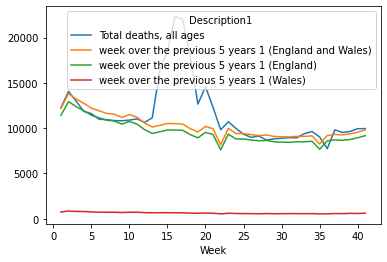

In [22]:
td_pivoted.plot()

In [24]:
deathbycause = weekly_data[8:11]

4,Description1,Description2,1,2,3,4,5,6,7,8,...,44,45,46,47,48,49,50,51,52,53
16,NaN,"Deaths by cause 2,3,4,5",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17,NaN,Deaths where the underlying cause was respirat...,2140,2476,2189,1893,1746,1572,1602,1619,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18,NaN,Deaths where COVID-19 was mentioned on the dea...,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
deathbyage_both = weekly_data[13:33].copy()

In [36]:
deathbyage_both

4,Description1,Description2,1,2,3,4,5,6,7,8,...,44,45,46,47,48,49,50,51,52,53
21,NaN,<1,48,50,69,53,50,30,43,51,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22,NaN,1-4,8,9,7,9,6,8,6,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23,NaN,5-9,4,8,5,4,5,4,2,6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24,NaN,10-14,4,9,4,8,4,4,4,7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25,NaN,15-19,6,16,10,15,23,10,16,20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26,NaN,20-24,11,23,25,30,23,34,26,18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27,NaN,25-29,17,37,37,36,28,23,27,29,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28,NaN,30-34,32,46,47,38,58,38,40,60,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29,NaN,35-39,54,68,77,79,76,71,85,77,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30,NaN,40-44,69,85,118,116,100,95,92,117,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
##total_deaths = total_deaths[total_deaths[1].notna()]
column_list = list(deathbyage_both.columns)
id_vars = ['Description1','Description2']
for i in id_vars:
    column_list.remove(i)
##column_list
dba_b_melted = pd.melt(deathbyage_both, id_vars=id_vars, value_vars=column_list, var_name='Week', value_name='Value')
dba_b_pivoted = dba_b_melted.pivot(index='Week', columns='Description2',values='Value')

<AxesSubplot:xlabel='Week'>

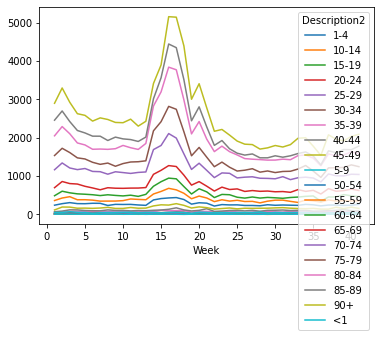

In [38]:
dba_b_pivoted.plot()

In [43]:
deathbyage_male = weekly_data[35:55].copy()
deathbyage_male

4,Description1,Description2,1,2,3,4,5,6,7,8,...,44,45,46,47,48,49,50,51,52,53
43,NaN,<1,30,29,38,28,22,14,29,32,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
44,NaN,1-4,5,4,4,6,4,5,4,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
45,NaN,5-9,2,4,4,4,4,2,1,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46,NaN,10-14,1,7,3,4,3,4,3,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
47,NaN,15-19,5,8,5,14,17,8,9,14,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48,NaN,20-24,7,14,21,23,16,23,19,14,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
49,NaN,25-29,7,28,31,31,19,11,19,17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50,NaN,30-34,21,28,29,22,40,24,27,39,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
51,NaN,35-39,32,46,49,45,45,53,52,46,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
52,NaN,40-44,43,52,72,79,58,55,58,72,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [44]:
##total_deaths = total_deaths[total_deaths[1].notna()]
column_list = list(deathbyage_male.columns)
id_vars = ['Description1','Description2']
for i in id_vars:
    column_list.remove(i)
##column_list
dba_m_melted = pd.melt(deathbyage_male, id_vars=id_vars, value_vars=column_list, var_name='Week', value_name='Value')
dba_m_pivoted = dba_m_melted.pivot(index='Week', columns='Description2',values='Value')

<AxesSubplot:xlabel='Week'>

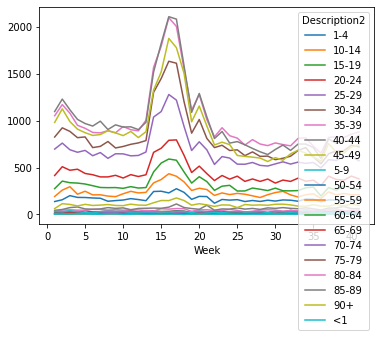

In [45]:
dba_m_pivoted.plot()